# Data Project 3 - Detección de Enfermedad Cardíaca

Grupo X: Francisco Javier Conejero Puche y Franziska Sophie Kröger

# ! ENLACES A MODELOS

* [original heart dataset](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)
* [multi class heart desease](https://www.kaggle.com/code/arnoldyanga/heart-disease-multi-class-classification)
* [multi class desicion tree](https://www.kaggle.com/code/gizemtanriver/multi-class-classification-by-decision-tree)
* [ejecutar/comparar varios modelos binarios](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Table-of-Contents)


## INTRODUCCIÓN
### Objetivos
Este proyecto de datos tiene como objetivo la detección de enfermedad cardiaca mediante el análisis de un conjunto de datos que contiene información sobremúltiples pacientes con diferentes grados de enfermedad o ausencia de la misma.

Esta tarea parece sencilla, sin embargo, debemos ser conscientes de la importancia de proporcionar una solución a este tipo de problemas y el gran avance que supone en la práctica clínica. La detección temprana de enfermedades cardiovasculares en el momento del ingreso o la consulta médica puede salvar o mejorar la calidad de vida de los pacientes, por ello, desarrollar modelos precisos y eficientes puede ayudar a los profesionales médicos en la toma de decisiones clínicas y en la personalización de los tratamientos.

Este desafío consiste en entrenar un modelo de aprendizaje automático que pueda predecir la presencia de enfermedad en el corazón basándose en las características recogidas en diferentes pruebas médicas como variables clínicas.

### Dataset
El conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

| Variable | Tipo de variable | Tipo de data | Descripción |
|---|---|---|---|
|**age**|cuantitativa discreta|int|edad del paciente|
|**sex**|categórica nominativa|int|género del paciente (1 = hombre; 0 = mujer)|
|**cp**|categórica nominativa|int|tipo de dolor de pecho (1 = angina típica; 2 = angina atípica; 3 = dolor no-anginoso; 4 = asintomático)|
|**trestbps**| cuantitativa discreta|int|presión arterial en reposo (en mm Hg al ingreso en el hospital)|
|**chol**|cuantitativa discreta|int|colesterol sérico en mg/dl|
|**fbs**|categórica nominativa|int|dolor provocado por el esfuerzo (1 = sí; 0 = no)|
|**restecg**|categórica nominativa|int|resultados electrocardiográficos en reposo (0 = normal; 1 = presenta anormalidad de la onda ST-T; 2 = presenta probable o definida hipertrofia ventricular izquierda)|
|**thalach**|cuantitativa discreta|int|frecuencia cardiaca en reposo|
|**exang**|categórica nominativa|int|angina inducida por el ejercicio (1 = sí; 0 = no)|
|**oldpeak**|cuantitativa continua|float|depresión del ST inducida por el ejercicio en relación con el reposo|
|**slope**|categórica nominativa|int|la pendiente del segmento ST en ejercicio máximo (1 = pendiente ascendente; 2 = plano; 3 = pendiente descendente)|
|**ca**|cuantitativa discreta|int|número de vasos mayores (0-3) coloreados por flouroscopia|
|**thal**|categórica nominativa|int|(3 = normal; 6 = defecto fijo; 7 = defecto reversible)|

.
___

2 columnas más:

| Variable | Tipo de variable | Tipo de data | Descripción |
|---|---|---|---|
|**label**|categórica nominativa|int|nuestro target; (0= ?; 1= ?; 2=?; 3=?; 4=?)|
|**split**|categórica nominativa|str|identifica si esa muestra pertenece al conjunto de entrenamiento 'train' o de validación 'val')|

### Metodología
hacer un resumen de los pasos que hemos hecho

## DATASET & LIBRERÍAS

In [1017]:
#%pip install xgboost

In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os


from multiprocessing import cpu_count

# Modelos Algoritmos
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


In [1019]:
df = pd.read_csv('dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

## EXPLORATORY DATA ANALYSIS

### Descriptiva general

In [1020]:
# dimensiones del dataset
print(f'''El dataset df contiene {df.shape[0]} filas y {df.shape[1]} columnas.
El dataset df_test contiene {df_test.shape[0]} filas y {df_test.shape[1]} columnas.
''')

df.head(), df_test.head()

El dataset df contiene 866 filas y 15 columnas.
El dataset df_test contiene 50 filas y 13 columnas.



(    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0  1.0  2.0     126.0  166.0  0.0      1.0    140.0    0.0      0.0   
 1  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
 2  57.0  1.0  2.0     180.0  285.0  1.0      1.0    120.0    0.0      0.8   
 3  66.0  1.0  3.0     110.0  213.0  1.0      2.0     99.0    1.0      1.3   
 4  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
 
    slope   ca  thal  label  split  
 0    NaN  NaN   NaN      0    val  
 1    1.0  0.0   7.0      0  train  
 2    NaN  NaN   NaN      1  train  
 3    2.0  NaN   NaN      0  train  
 4    2.0  0.0   7.0      1  train  ,
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0  1.0  2.0     124.0  224.0  1.0      0.0    161.0    0.0      2.0   
 1  61.0  1.0  4.0     125.0    0.0  0.0      0.0    105.0    1.0      0.0   
 2  52.0  1.0  4.0     135.0    0.0  NaN      0.0    128.0    1.0      2.

In [1021]:
df.info(), '-'*15, df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       866 non-null    float64
 1   sex       866 non-null    float64
 2   cp        866 non-null    float64
 3   trestbps  809 non-null    float64
 4   chol      840 non-null    float64
 5   fbs       784 non-null    float64
 6   restecg   865 non-null    float64
 7   thalach   811 non-null    float64
 8   exang     811 non-null    float64
 9   oldpeak   806 non-null    float64
 10  slope     570 non-null    float64
 11  ca        297 non-null    float64
 12  thal      413 non-null    float64
 13  label     866 non-null    int64  
 14  split     866 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 101.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ----------

(None, '---------------', None)

In [1022]:
# diferenciar las variables
categoricas = ['sex','cp','fbs','restecg','exang','slope','thal', 'ca']
numericas = ['age', 'trestbps','chol','thalach','oldpeak']
target = ["label"]

print("Las variables categóricas son: ", *categoricas)
print("Las variables númericas son: ", *numericas)
print("El target es: ", *target)

Las variables categóricas son:  sex cp fbs restecg exang slope thal ca
Las variables númericas son:  age trestbps chol thalach oldpeak
El target es:  label


In [1023]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
count,866.000000,866.000000,866.000000,809.000000,840.00000,784.000000,865.000000,811.000000,811.000000,806.000000,570.000000,297.000000,413.000000,866.000000,866
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,692
mean,53.436490,0.788684,3.254042,132.092707,199.42381,0.159439,0.603468,137.692972,0.385943,0.846650,1.761404,0.703704,5.050847,1.085450,NaN
std,9.471283,0.408478,0.919984,19.129122,109.65967,0.366318,0.805788,26.156664,0.487118,1.071277,0.618336,1.049334,1.925766,1.232356,NaN
min,28.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000,NaN
25%,47.000000,1.000000,3.000000,120.000000,176.75000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,NaN
50%,54.000000,1.000000,4.000000,130.000000,223.00000,0.000000,0.000000,140.000000,0.000000,0.450000,2.000000,0.000000,6.000000,1.000000,NaN
75%,60.000000,1.000000,4.000000,140.000000,267.25000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000,NaN


In [1024]:
# imprimir valores únicos para obtener más información sobre los datos
for column in df:
  print(f'''Valores únicos de la columna {column}: 
  {df[column].unique()}
  ''')

Valores únicos de la columna age: 
  [56. 52. 57. 66. 67. 54. 59. 48. 73. 51. 45. 65. 53. 47. 55. 41. 61. 63.
 69. 62. 58. 35. 46. 44. 60. 43. 50. 39. 36. 34. 28. 32. 38. 49. 77. 72.
 75. 42. 33. 37. 64. 68. 74. 70. 31. 40. 71. 29. 30. 76.]
  
Valores únicos de la columna sex: 
  [1. 0.]
  
Valores únicos de la columna cp: 
  [2. 3. 4. 1.]
  
Valores únicos de la columna trestbps: 
  [126. 172. 180. 110. 152. 120. 170. 130. 160. 164. 125. 138.  nan 124.
 112. 150. 140. 178. 135.  95. 132.  96. 118. 128. 115. 145. 102. 105.
 134. 108. 100. 155. 144. 190. 142. 136. 122. 165. 104.   0. 154. 158.
 148. 116. 101. 106. 117. 129. 200. 156. 185.  98. 113. 127. 146. 114.
 174.  94. 123.  80. 192.  92.]
  
Valores únicos de la columna chol: 
  [166. 199. 285. 213. 212. 221. 326. 245.   0. 176. 240. 202. 188. 195.
 237. 223. 312. 243. 275. 327. 268. 260. 242. 256. 259.  nan 219. 308.
 167. 214. 286. 335. 246. 235. 193. 293. 247. 311. 218. 227. 339. 288.
 184. 305. 161. 132. 283. 274. 277. 529. 28

In [1025]:
# convertir float a int
col = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']
df[col] = df[col].astype('Int64')
df_test[col] = df_test[col].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       866 non-null    Int64  
 1   sex       866 non-null    Int64  
 2   cp        866 non-null    Int64  
 3   trestbps  809 non-null    Int64  
 4   chol      840 non-null    Int64  
 5   fbs       784 non-null    Int64  
 6   restecg   865 non-null    Int64  
 7   thalach   811 non-null    Int64  
 8   exang     811 non-null    Int64  
 9   oldpeak   806 non-null    float64
 10  slope     570 non-null    Int64  
 11  ca        297 non-null    Int64  
 12  thal      413 non-null    Int64  
 13  label     866 non-null    int64  
 14  split     866 non-null    object 
dtypes: Int64(12), float64(1), int64(1), object(1)
memory usage: 111.8+ KB


In [1026]:
# Estadísticas básicas por output
df.groupby(['label']).describe().loc[:,(slice(None),['mean','std'])]

age                 sex                  cp            \
            mean       std      mean       std      mean       std   
label                                                                
0      50.511278  9.472215  0.651629  0.477052  2.774436   0.90184   
1      54.351351  9.267217  0.881081  0.324571  3.578378  0.790959   
2      56.104839  8.365452  0.919355  0.273394  3.741935  0.648588   
3          58.16  7.851854     0.936  0.245738     3.696  0.662644   
4      55.757576  8.681987  0.878788  0.331434  3.727273    0.6742   

         trestbps                   chol              ...     exang            \
             mean        std        mean         std  ...      mean       std   
label                                                 ...                       
0      130.013193  16.897836  227.782723   76.617963  ...   0.14248  0.350004   
1      130.325581  20.033564  169.130435  120.540651  ...  0.517442  0.501155   
2      134.163793  18.271833   169.05042  138.195198  ...  0.589744  0.493996   
3      137.855856  23.750157  178.844262  127.480611  ...  0.705357  0.457931   
4      138.935484  19.017423  225.666667    98.96043  ...  0.709677  0.461414   

        oldpeak               slope                  ca                thal  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
0      0.413757  0.712280  1.485714  0.612693  0.341615  0.942772  3.983516   
1      0.808187  0.953657  1.818841  0.582413  0.754386  0.871794  5.701031   
2      1.268103  1.179285  1.968421  0.573393      1.25  0.983739  5.847458   
3      1.610909  1.243799  1.969388  0.526691  1.485714  0.981338  6.135593   
4      2.048387  1.274067  2.103448  0.488791  1.583333  1.240112    6.3125   

                 
            std  
label            
0      1.683443  
1      1.797944  
2      1.648548  
3      1.547608  
4      1.352467  

[5 rows x 26 columns]

### Descriptiva univariante

In [1027]:
# Descriptiva del output: Tabla de frequencia
tab = pd.crosstab(index=df['label'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
label,
0,46.07
1,21.36
2,14.32
3,14.43
4,3.81


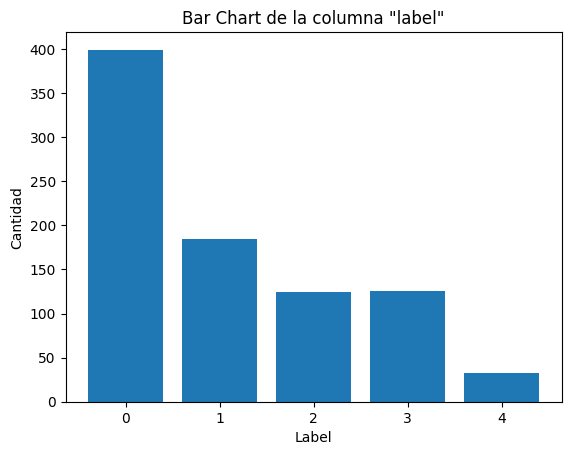

In [1028]:
# Descriptiva del output: Bar Chart
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Cantidad')
plt.title('Bar Chart de la columna "label"')
plt.show()

Descriptiva de las variables categóricas: Porcentaje con diagramas de sectores 


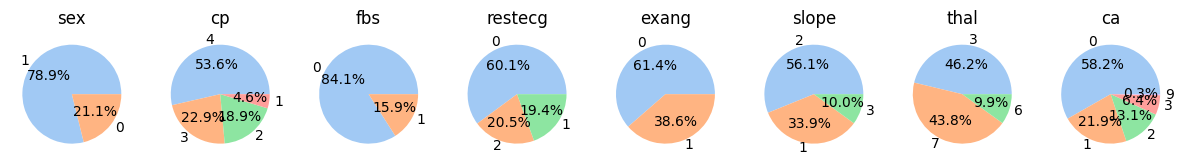

In [1029]:
# Descriptiva de las variables categóricas: Frequencia/ porcentaje con diagramas de sectores 
fig, axes = plt.subplots(1, len(categoricas), figsize=(15, 5))
colors = sns.color_palette('pastel')[0:5]

for idx, var in enumerate(categoricas):
    counts = df[var].value_counts()
    axes[idx].pie(counts, labels=counts.index, colors = colors, autopct='%1.1f%%')
    axes[idx].set_title(var)

print('Descriptiva de las variables categóricas: Porcentaje con diagramas de sectores ')
plt.show()

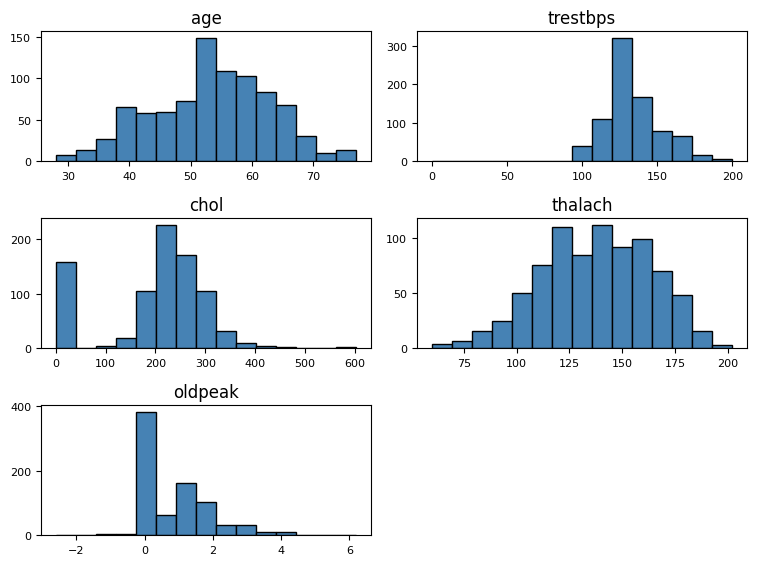

In [1030]:
# Descriptiva de las variables númericas: Histogramas
df[numericas].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

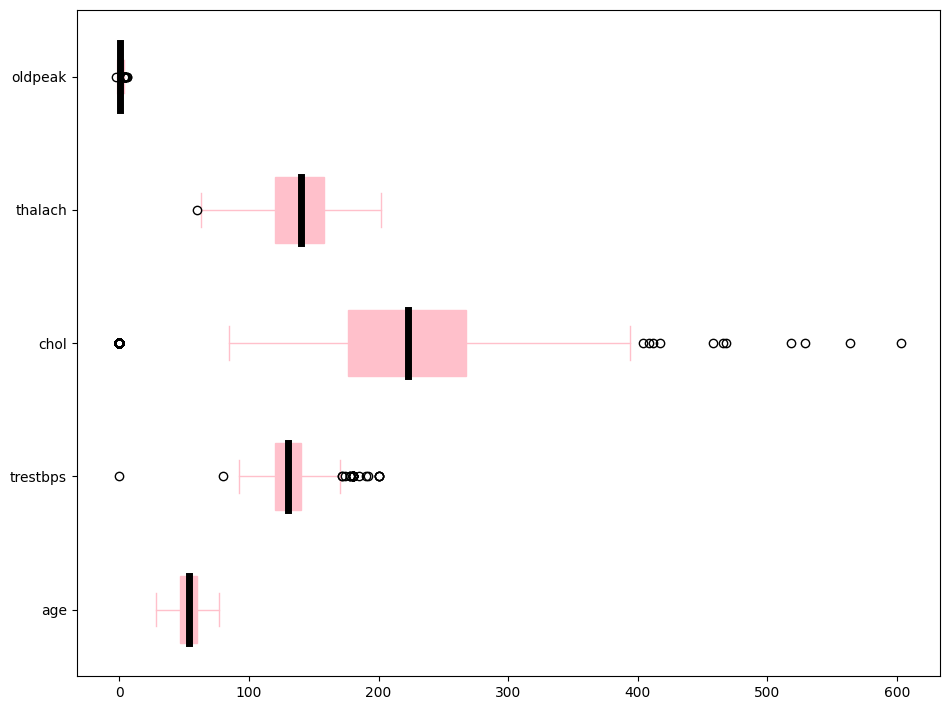

In [1031]:
# Descriptiva de las variables númericas: Boxplots
medianprops = dict(linestyle='-', linewidth=5, color='black')

df[numericas].boxplot(color='pink', vert= False, patch_artist=True, medianprops=medianprops, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

### Descriptiva bivariante

C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (m

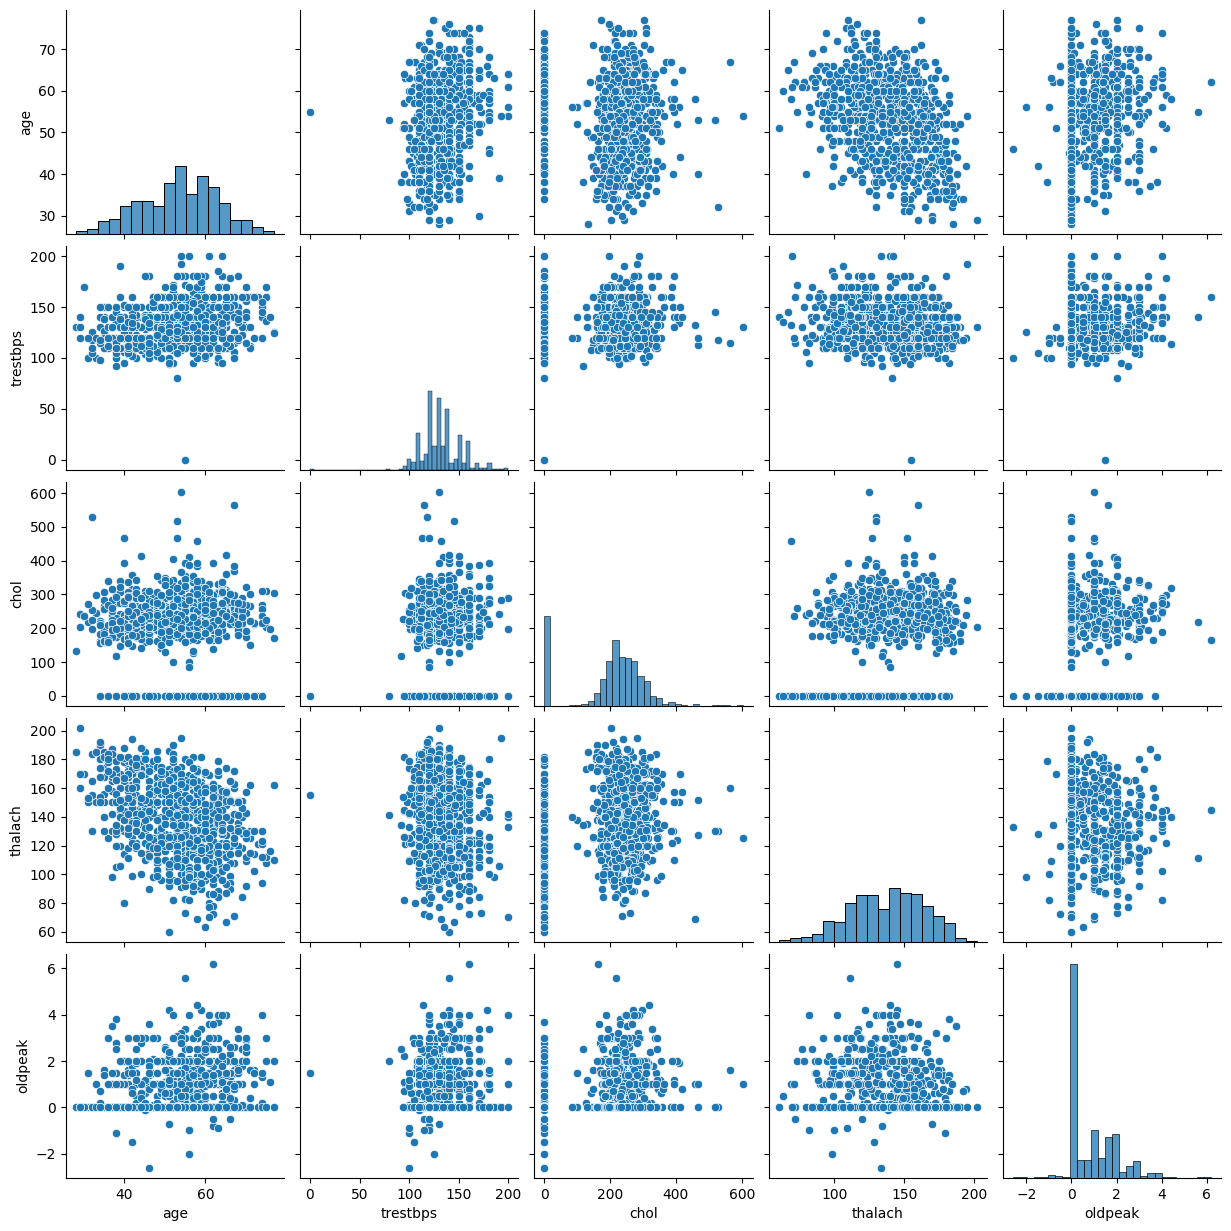

In [1032]:
# construir el Pairplot
sns.pairplot(df[numericas], diag_kind = 'hist')

In [1033]:
# Tabla de correlaciones
df_corr = df[numericas].corr()
df_corr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.245349,-0.103973,-0.373247,0.244317
trestbps,0.245349,1.000000,0.076583,-0.107466,0.146157
chol,-0.103973,0.076583,1.000000,0.245580,0.046745
thalach,-0.373247,-0.107466,0.245580,1.000000,-0.154380
oldpeak,0.244317,0.146157,0.046745,-0.154380,1.000000


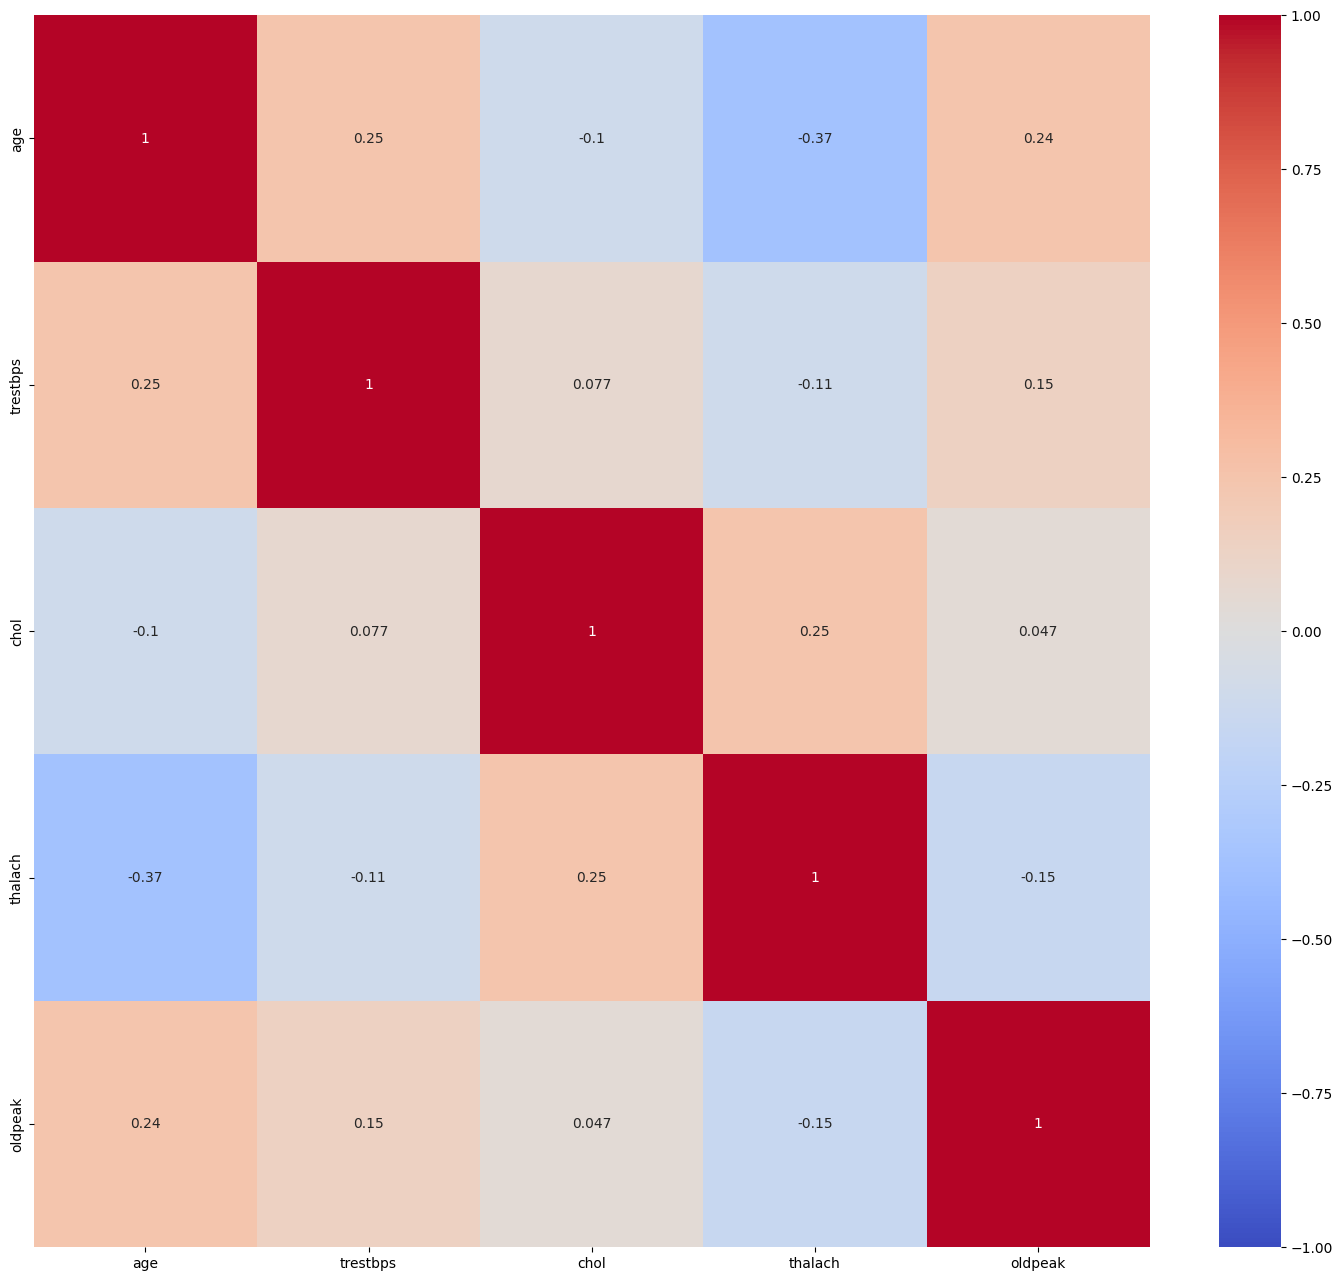

In [1034]:
# Matriz de correlación
plt.figure(figsize=(18,16))
sns.heatmap(df_corr, vmin=-1, annot=True, cmap='coolwarm')
plt.show()

## PREPROCESAMIENTO DE LOS DATOS

**Resumen de los pasos del preprocesamiento**
1. Establacer **target** (qué variable quieres predicir)
2. **Seleccionar variables** (cúales variables quieres usar para predecir)
3. **Oversampling** (si hay desbalance de clases, se añaden más ejemplos de la clase minoritaria)
4. **Subsampling** (si hay desbalance de clases, se eliminan ejemplos de la clase mayoritaria)
5. Eliminar variables **constantes** (si hay variables que no cambian, se eliminan porque no aportan valor)
6. Eliminar variables **no informativas** (si hay variables que no aportan información, se eliminan)
7. Rellenar **missing values** (si hay valores nulos, se rellenan con la media, mediana, moda, etc)
8. **Agrupar** categorías (si hay categorías con muy pocos ejemplos, se agrupan en una categoría "otros")
9. **One Hot Encoding** (si hay variables categóricas, se convierten a variables numéricas)
10. **Escalado** de variables (si hay variables con diferentes escalas, se escalan a la misma escala)
11. Eliminar variables **irrelevantes** (si hay variables que no aportan valor según sus correlaciones, se eliminan)
12. Eliminar variables **redundantes** (si hay variables que son redundantes (alta correlación entre ellas), se eliminan)
13. **Variable Importance** (hacer un ranking de los variables)
14. **Weighting** (darle más peso a las variables más importantes)
15. **PCA** (si hay muchas variables, se reducen dimensiones/ a un número menor de variables)

### 1) Establecer target

Debido a que hacemos ambos una clasificación binaria y multi-class, creamos una nueva columna para un target binario cuyos valores son:

*   0: ausencia de la enfermedad
*   1: enfermedad cardíaca




In [1035]:
# crear un nuevo dataset con un target cuyos valores son [0: ausencia de la enfermedad; 1: enfermedad cardíaca]
#df_binary = df.copy()
#df_binary_test = df_test.copy()
df['label_binary'] = df['label'].replace([2,3,4], 1)

df.head(), '/n', df_test.head()


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   56    1   2       126   166    0        1      140      0      0.0   <NA>   
 1   52    1   3       172   199    1        0      162      0      0.5      1   
 2   57    1   2       180   285    1        1      120      0      0.8   <NA>   
 3   66    1   3       110   213    1        2       99      1      1.3      2   
 4   67    1   3       152   212    0        2      150      0      0.8      2   
 
      ca  thal  label  split  label_binary  
 0  <NA>  <NA>      0    val             0  
 1     0     7      0  train             0  
 2  <NA>  <NA>      1  train             1  
 3  <NA>  <NA>      0  train             0  
 4     0     7      1  train             1  ,
 '/n',
    age  sex  cp  trestbps  chol   fbs  restecg  thalach  exang  oldpeak  \
 0   56    1   2       124   224     1        0      161      0      2.0   
 1   61    1   4       125     0     0        0      105      1      0.0   


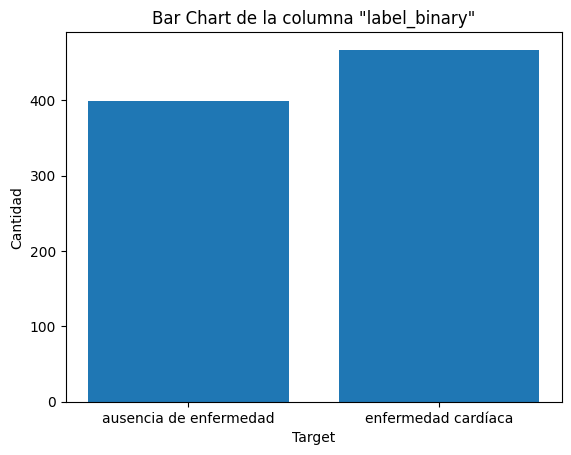

In [1036]:
# Descriptiva del target: Bar Chart
label_counts = df['label_binary'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Target')
plt.ylabel('Cantidad')
plt.title('Bar Chart de la columna "label_binary"')
plt.xticks([0, 1], ['ausencia de enfermedad', 'enfermedad cardíaca'])
plt.show()

### 2) Selecionar variables

In [1037]:
# De momento analizamos el dataset con todas sus variables independientes: Estatísticas básicas
df[numericas].describe(), '/n', df_test[numericas].describe()

(            age    trestbps       chol     thalach     oldpeak
 count     866.0       809.0      840.0       811.0  806.000000
 mean   53.43649  132.092707  199.42381  137.692972    0.846650
 std    9.471283   19.129122  109.65967   26.156664    1.071277
 min        28.0         0.0        0.0        60.0   -2.600000
 25%        47.0       120.0     176.75       120.0    0.000000
 50%        54.0       130.0      223.0       140.0    0.450000
 75%        60.0       140.0     267.25       158.0    1.500000
 max        77.0       200.0      603.0       202.0    6.200000,
 '/n',
             age    trestbps        chol   thalach    oldpeak
 count      50.0        48.0        46.0      50.0  48.000000
 mean      55.12  132.979167  194.086957    134.94   1.366667
 std    7.922172   18.014757  130.567109  22.18421   1.280514
 min        35.0        94.0         0.0      92.0   0.000000
 25%        50.0       120.0       38.25     120.0   0.000000
 50%        56.0       130.0       222.0    

In [1038]:
df[categoricas].astype('category').describe(), '/n', df_test[categoricas].astype('category').describe()

(        sex   cp  fbs  restecg  exang  slope  thal   ca
 count   866  866  784      865    811    570   413  297
 unique    2    4    2        3      2      3     3    5
 top       1    4    0        0      0      2     3    0
 freq    683  464  659      520    498    320   191  173,
 '/n',
         sex  cp  fbs  restecg  exang  slope  thal  ca
 count    50  50   43       49     50     38    20  12
 unique    2   4    2        3      2      3     3   4
 top       1   4    0        0      0      2     7   0
 freq     39  31   31       29     27     24    11   7)

### 3) Eliminar variables constantes

Según el análisis descriptivo no hay variables constantes, por lo tanto no hace falta eliminar ninguna variable.

### 4) Eliminar variables no informativas

In [1039]:
# detectar missing values
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age              0.00
 sex              0.00
 cp               0.00
 trestbps         6.58
 chol             3.00
 fbs              9.47
 restecg          0.12
 thalach          6.35
 exang            6.35
 oldpeak          6.93
 slope           34.18
 ca              65.70
 thal            52.31
 label            0.00
 split            0.00
 label_binary     0.00
 dtype: float64,
 '---------------',
 age          0.0
 sex          0.0
 cp           0.0
 trestbps     4.0
 chol         8.0
 fbs         14.0
 restecg      2.0
 thalach      0.0
 exang        0.0
 oldpeak      4.0
 slope       24.0
 ca          76.0
 thal        60.0
 dtype: float64)

In [1040]:
# eliminar variables thal y ca
df.drop(['thal', 'ca'], axis =1, inplace=True)
df_test.drop(['thal', 'ca'], axis =1, inplace=True)
categoricas = ['sex','cp','fbs','restecg','exang','slope']
df.head(), '-'*80, df_test.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   56    1   2       126   166    0        1      140      0      0.0   <NA>   
 1   52    1   3       172   199    1        0      162      0      0.5      1   
 2   57    1   2       180   285    1        1      120      0      0.8   <NA>   
 3   66    1   3       110   213    1        2       99      1      1.3      2   
 4   67    1   3       152   212    0        2      150      0      0.8      2   
 
    label  split  label_binary  
 0      0    val             0  
 1      0  train             0  
 2      1  train             1  
 3      0  train             0  
 4      1  train             1  ,
 '--------------------------------------------------------------------------------',
    age  sex  cp  trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope
 0   56    1   2       124   224     1        0      161      0      2.0      2
 1   61    1   4       125     0     0        0      105      

Como la mayoría de los valores de las columnas 'thal' y 'ca' son <NA>, parece que esas variables no aportan valor y por lo tanto, las quitamos.

### 5) Rellenar missing values

In [1041]:
# con las modas para las variables categóricas
modes = df[categoricas].mode(axis=0, dropna=True).iloc[0].to_dict()

modes

{'sex': 1, 'cp': 4, 'fbs': 0, 'restecg': 0, 'exang': 0, 'slope': 2}

In [1042]:
# rellenarlas
df = df.fillna(value = modes, axis = 0)
df_test = df_test.fillna(value = modes, axis = 0)

In [1043]:
# comprobar el replazado de los valores nulos de las variables categóricas
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age             0.00
 sex             0.00
 cp              0.00
 trestbps        6.58
 chol            3.00
 fbs             0.00
 restecg         0.00
 thalach         6.35
 exang           0.00
 oldpeak         6.93
 slope           0.00
 label           0.00
 split           0.00
 label_binary    0.00
 dtype: float64,
 '---------------',
 age         0.0
 sex         0.0
 cp          0.0
 trestbps    4.0
 chol        8.0
 fbs         0.0
 restecg     0.0
 thalach     0.0
 exang       0.0
 oldpeak     4.0
 slope       0.0
 dtype: float64)

In [1044]:
# con las medias para las variables númericas
numeric_int = ['age', 'trestbps','chol','thalach']

means = df[numeric_int].apply(lambda x: int(round(np.mean(x), 0))).to_dict()
means['oldpeak'] = df['oldpeak'].mean()

means

{'age': 53,
 'trestbps': 132,
 'chol': 199,
 'thalach': 138,
 'oldpeak': 0.8466501240694789}

In [1049]:
# rellenarlas
df = df.fillna(value = means, axis = 0)
df_test = df_test.fillna(value = means, axis = 0)

In [1050]:
# comprobar el replazado de los valores nulos de las variables númericas
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age             0.0
 sex             0.0
 cp              0.0
 trestbps        0.0
 chol            0.0
 fbs             0.0
 restecg         0.0
 thalach         0.0
 exang           0.0
 oldpeak         0.0
 slope           0.0
 label           0.0
 split           0.0
 label_binary    0.0
 dtype: float64,
 '---------------',
 age         0.0
 sex         0.0
 cp          0.0
 trestbps    0.0
 chol        0.0
 fbs         0.0
 restecg     0.0
 thalach     0.0
 exang       0.0
 oldpeak     0.0
 slope       0.0
 dtype: float64)

### 8) Agrupar valores

Según la descriptiva univariante de cada variable que nos queda en el dataset, no pensamos que haga falta agrupar valores a una nueva categoría (p.ej. 'otros'), ya que no hay ninguna categoría con menos de 5% de los valores en total.


### 9) One Hot Encoding

In [1052]:
def one_hot(X, cols):
    # Create a copy of the input DataFrame
    df_ohe = X.copy()
    # Create the OneHotEncoder object
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    # Loop through each column and encode it
    for col in cols:
        # Fit and transform the OneHotEncoder on the current column
        ohe_features = ohe.fit_transform(df_ohe[[col]])
        # Create a DataFrame with the encoded features and rename the columns
        ohe_df = pd.DataFrame(ohe_features, dtype='int64')
        ohe_df.columns = pd.DataFrame(ohe.get_feature_names_out())
        ohe_df = ohe_df.rename(columns={col: str(col).replace('(', '').replace(')', '').replace(',','').replace("'", "") for col in ohe_df.columns})

        # Concatenate the encoded features with the original DataFrame
        df_ohe = pd.concat([df_ohe, ohe_df], axis=1)
        # Drop the original column from the DataFrame
        df_ohe = df_ohe.drop(columns=[col])
    print(f"The dummy variables for {cols} have been created.")
    return df_ohe

# Llamamos a la funcion para crear las dummy variables.
lista_ohe = ["cp","restecg","slope"]
df_ohe = one_hot(df, lista_ohe)
df_test_ohe = one_hot(df_test, lista_ohe)

df_ohe.head(), df_test_ohe.head()

The dummy variables for ['cp', 'restecg', 'slope'] have been created.
The dummy variables for ['cp', 'restecg', 'slope'] have been created.


(   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  label  split  \
 0   56    1       126   166    0      140      0      0.0      0    val   
 1   52    1       172   199    1      162      0      0.5      0  train   
 2   57    1       180   285    1      120      0      0.8      1  train   
 3   66    1       110   213    1       99      1      1.3      0  train   
 4   67    1       152   212    0      150      0      0.8      1  train   
 
    label_binary  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
 0             0       1       0       0            1            0          1   
 1             0       0       1       0            0            0          0   
 2             1       1       0       0            1            0          1   
 3             0       0       1       0            0            1          1   
 4             1       0       1       0            0            1          1   
 
    slope_3.0  
 0          0  
 1          0  
 2    

### 10) Escalado de variables

In [1060]:
#from sklearn.preprocessing import scale

def scale_var(X, col):
    dat_scaled = X.copy()
    dat_scaled[col] = pd.DataFrame(scale(X[col]))
    print(f'The variables {col} have been scaled')   
    return dat_scaled

df_scaled = scale_var(df_ohe, numericas)
df_test_scaled = scale_var(df_test_ohe, numericas)

df_scaled.describe().loc[['mean', 'std']], df_test_scaled.describe().loc[['mean', 'std']]

The variables ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] have been scaled
The variables ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] have been scaled


(               age       sex      trestbps          chol       fbs  \
 mean  9.025370e-17  0.788684 -5.353685e-16 -1.117915e-16  0.144342   
 std   1.000578e+00  0.408478  1.000578e+00  1.000578e+00  0.351639   
 
            thalach     exang       oldpeak     label  label_binary    cp_2.0  \
 mean  2.461464e-16  0.361432 -3.692197e-17  1.085450      0.539261  0.189376   
 std   1.000578e+00  0.480693  1.000578e+00  1.232356      0.498744  0.392034   
 
         cp_3.0    cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  
 mean  0.228637  0.535797     0.193995     0.204388   0.711316    0.06582  
 std   0.420198  0.499005     0.395654     0.403487   0.453412    0.24811  ,
                age       sex      trestbps          chol       fbs  \
 mean  3.375078e-16      0.78  1.465494e-16  7.105427e-17      0.24   
 std   1.010153e+00  0.418452  1.010153e+00  1.010153e+00  0.431419   
 
            thalach     exang       oldpeak    cp_2.0    cp_3.0    cp_4.0  \
 mean  1.243450e-16

### 11+12) Eliminar variables irrelevantes y redundantes

*   irrelevantes: baja correlación con el target
*   redundantes: alta correlación con otra variable dependiente



<ipython-input-512-19c98319cc31>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_new.corr().transpose()


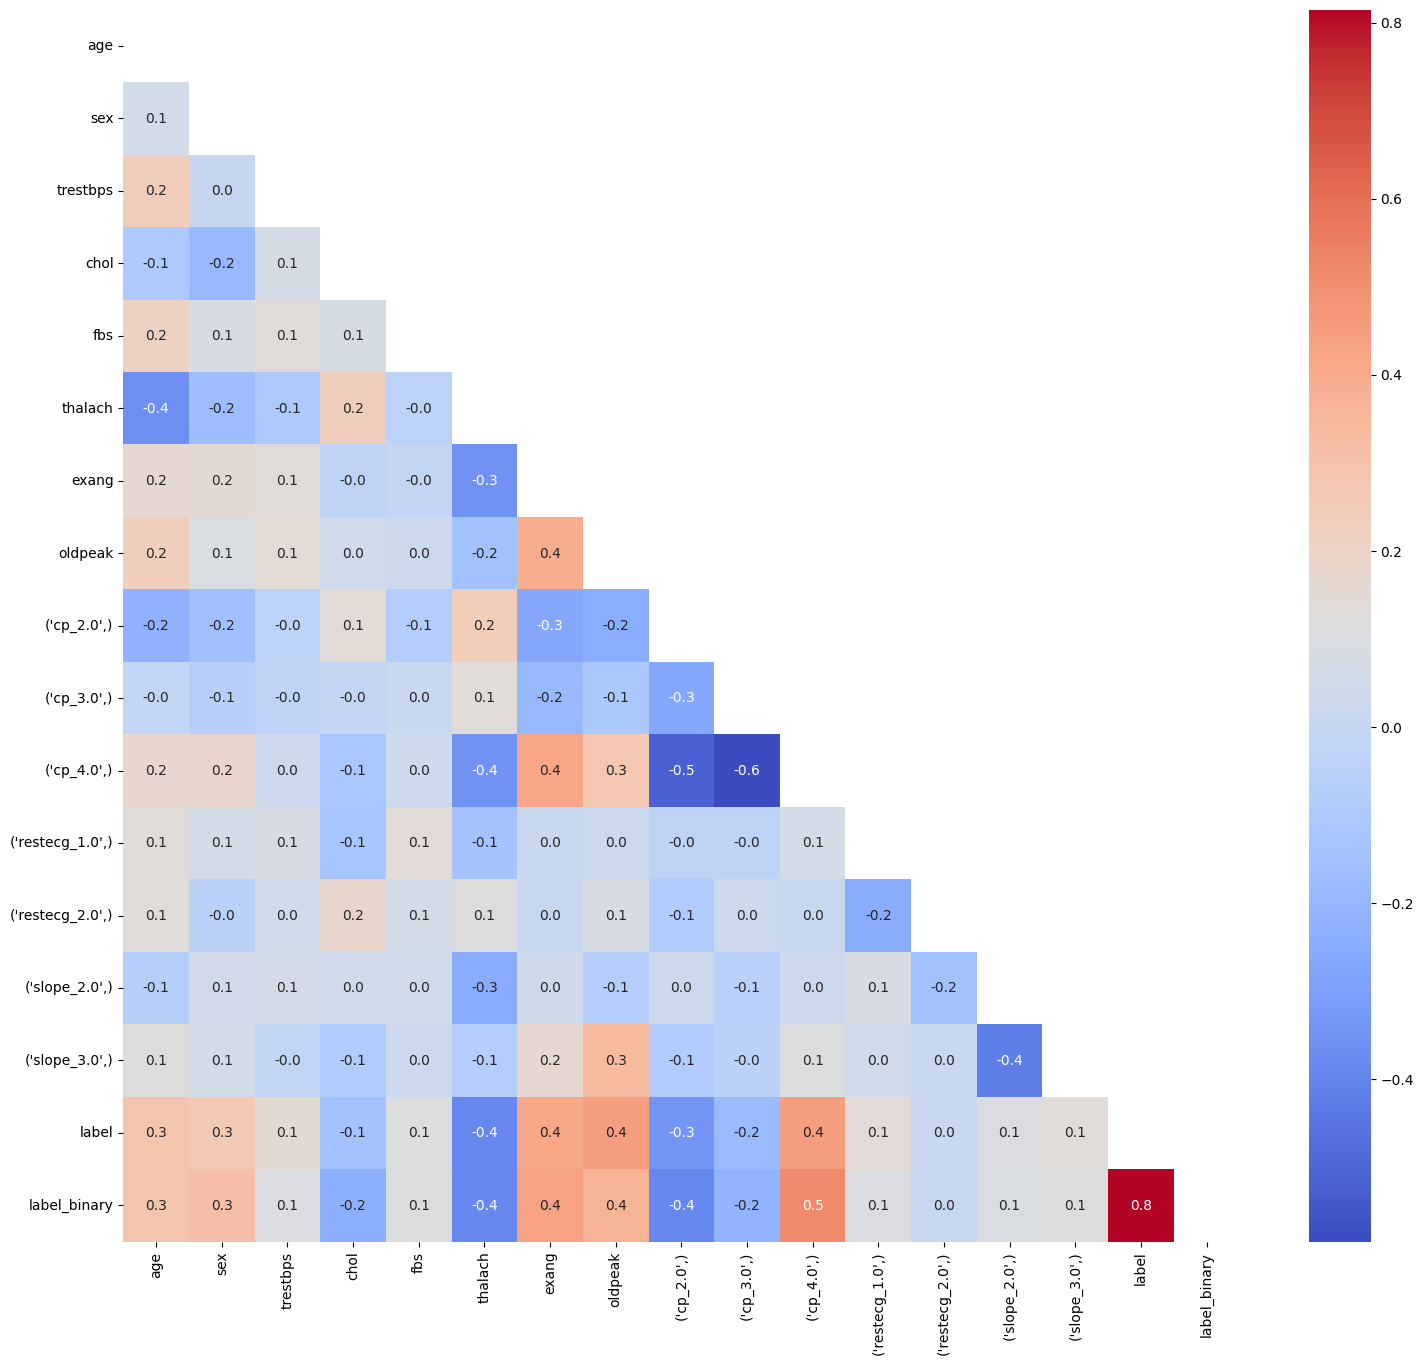

In [ ]:
# Matriz de correlación
plt.figure(figsize=(18,16))
df_corr = df_new.corr().transpose()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='coolwarm')
plt.show()



Aqui ya se puede ver que hay muchas variables redundantes e irrelevantes y ya que se puede apreciar que hay muchas variables con una correlacion igual a 0, hemos decidido primero realizar mas pruebas para ver de una mejor manera las variables que queremos eliminar.

### 6*7) Oversampling & Subsampling

Debido a que ya tenemos una muestra equilibrada del target binario, no hace falta hacer un Subsampling ni Oversampling para clasificación binaria.

Pero para la clasificación multi-class sí:

In [1062]:
# ver la distribución de las clases del target 'label'
df_new['label'].value_counts(normalize=True)


0    0.485333
1    0.214667
2    0.144000
3    0.124000
4    0.032000
Name: label, dtype: float64

In [1063]:
# Oversampling: duplicar filas de la clase minoritaria 
def oversampling(df, value_to_sample, percentage, base_value_sample=0):
    oversampling = df[df['label'] == value_to_sample].sample(int(percentage*df[df['label'] == base_value_sample].shape[0]),
                                                                      replace = True,       # puede duplicar varias veces la misma fila
                                                                      random_state = 0,     # para que sea reproducible
                                                                      axis = 0)
    return oversampling

# Concatenar los dos dataframes con los oversamplings para cada clase minoritaría
df_sampled = pd.concat([df_new, oversampling(df_new, 1, 0.6), oversampling(df_new, 2, 0.75), oversampling(df_new, 3, 0.75), oversampling(df_new, 4, 0.85)], axis=0) 

# Comprobar que se ha hecho bien el oversampling
df_sampled['label'].value_counts(normalize=True)

2    0.208996
1    0.207899
3    0.200768
0    0.199671
4    0.182666
Name: label, dtype: float64

### Guardar datos en x e y (train, test, val)

In [1065]:
X = df_sampled.copy()
X = X.drop(columns=['label', 'split', 'label_binary']).reset_index(drop=True)
y = df_sampled.copy()
y = y['label'].reset_index(drop=True)

print('Dataset sucessfully splitted into independent variables X & the target y.')

Dataset sucessfully splitted into independent variables X & the target y.


In [1066]:
# separar el dataset: df_train
df_train = df_sampled.copy()
df_train = df_sampled.drop(df_sampled[df_sampled.split != 'train'].index)

# separar el dataset: df_val
df_val = df_sampled.copy()
df_val = df_sampled.drop(df_sampled[df_sampled.split != 'val'].index)

for df in [df_train, df_val]:
    df.drop('split', axis=1, inplace=True)

print('Dataset sucessfully splitted into df_train & df_val and column "split" eliminated.')

Dataset sucessfully splitted into df_train & df_val and column "split" eliminated.


### 13) Variable Importance

In [1067]:
# separar los datasets df_val y df_train según la variable target 'y' y sus variables independientes

# variables independientes
xcol = df_test_new.columns.to_list()
X_test = df_test_new
X_train = df_train[xcol]
X_val = df_val[xcol]

# variable target para clasificación binaria
y_train_binary = df_train['label_binary']
y_val_binary = df_val['label_binary']

# variable target para clasificación multiclase
y_train_multi = df_train['label']
y_val_multi = df_val['label']

In [1068]:
# 3) Define the model for Binary 
#from sklearn.inspection import permutation_importance
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)

# 4) Train the model
model.fit(X_train, y_train_binary) 

# perform permutation importance
importance = permutation_importance(model, 
                                    X_val, 
                                    y_val_binary, 
                                    random_state = 1)

# get importance
importance_binary = pd.DataFrame({'variable' : X_train.columns.values, 'imp' : np.abs(importance.importances_mean)/np.max(np.abs(importance.importances_mean))}).sort_values(by = 'imp', ascending = False)
importance_binary

,variable,imp
9,cp_4.0,1.000000
6,oldpeak,0.966667
7,cp_2.0,0.766667
8,cp_3.0,0.733333
5,exang,0.533333
11,slope_2.0,0.466667
4,thalach,0.400000
1,sex,0.333333
0,age,0.300000
3,chol,0.133333


In [1069]:
# 3) Define the model for Multi-clase
#from sklearn.inspection import permutation_importance
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)

# 4) Train the model
model.fit(X_train, y_train_multi) 

# perform permutation importance
importance = permutation_importance(model, 
                                    X_val, 
                                    y_val_multi, 
                                    random_state = 1)

# get importance
importance_multi = pd.DataFrame({'variable' : X_train.columns.values, 'imp' : np.abs(importance.importances_mean)/np.max(np.abs(importance.importances_mean))}).sort_values(by = 'imp', ascending = False)
importance_multi

,variable,imp
1,sex,1.000000
6,oldpeak,0.668966
0,age,0.434483
5,exang,0.427586
10,restecg_1.0,0.337931
11,slope_2.0,0.317241
9,cp_4.0,0.296552
3,chol,0.248276
4,thalach,0.089655
2,trestbps,0.089655


In [1070]:
#Guardamos las primeras "nvars" variables de Multi.
nvars = 6

important_vars = importance_multi.variable.values[0:nvars].tolist()
important_vars

['sex', 'oldpeak', 'age', 'exang', 'restecg_1.0', 'slope_2.0']

In [1071]:
#Creamos un dataframe final con solo las variables importantes.
X_train_new = X_train[important_vars]
X_test_new = X_test[important_vars]
X_val_new = X_val[important_vars]

X_val_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 547
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          378 non-null    Int64  
 1   oldpeak      378 non-null    float64
 2   age          378 non-null    float64
 3   exang        378 non-null    Int64  
 4   restecg_1.0  378 non-null    int64  
 5   slope_2.0    378 non-null    int64  
dtypes: Int64(2), float64(2), int64(2)
memory usage: 21.4 KB


### 14) Weighting

dar pesos a las variables más importantes

(las primeras 3!?)

### 15) PCA

In [1072]:
from sklearn.decomposition import PCA
threshold = 0.8

# 3) Define model
pca = PCA()

# 4) Train model
pca.fit(X_train)

# 5) Make "predictions"
dat_pca = pd.DataFrame(pca.transform(X))

variance_explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.min(np.where(variance_explained > threshold)) + 1
dat_new = dat_pca.iloc[:,0:n_components]
dat_new

,0,1,2,3,4
0,0.887913,0.535879,-0.837387,-0.458089,0.105813
1,-0.570390,0.792046,0.255579,0.235954,1.953164
2,-0.673797,-0.784655,-1.194693,-1.410604,-0.232754
3,0.865991,-0.090760,0.198136,-0.420095,0.472968
4,1.697133,-0.551837,-0.656867,-0.295938,-0.369766
...,...,...,...,...,...
1818,0.227412,0.692509,-0.806291,1.635656,0.372158
1819,-2.111320,-0.538520,1.818135,-0.154312,-0.014401
1820,-0.214536,2.588757,-0.322726,0.397001,0.087913
1821,0.228624,-0.019763,-1.283461,1.130924,0.877372


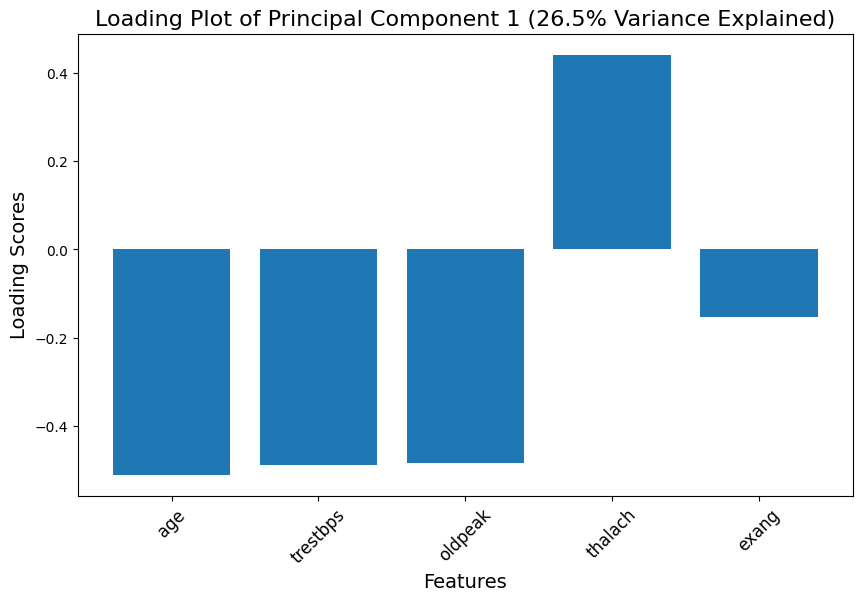

In [1076]:
def get_topfeatures_scores(pca, X, n_components):
    loading_scores = pd.Series(pca.components_[0], index=X.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_features = sorted_loading_scores[0:n_components].index.values
    return top_features,loading_scores

top_features, loading_scores = get_topfeatures_scores(pca, X, 5)

# Plot the loading scores
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(len(top_features)), loading_scores[top_features])
ax.set_xticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=45, fontsize=12)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Loading Scores', fontsize=14)
ax.set_title('Loading Plot of Principal Component 1 ({:.1f}% Variance Explained)'.format(pca.explained_variance_ratio_[0]*100), fontsize=16)
plt.show()

### MODELOS

### PREDICCIÓN CON GRID SEARCH

In [ ]:
# parametros generales
random_state = 1;
nthread = multiprocessing.cpu_count() - 1;

In [ ]:
# el grid que llevamos a cabo

# Regresion Logística
reg_values = [1e-05, 1e-04, 1e-03, 1e-02,1e-01,1e-00,1e01]

# SVM
C_values = [0.1, 1, 100];
gamma_svm_values = [0.01, 0.1, 1];
epsilon_values = [1, 0.1];

# Arbol de Decision
max_features_values = [None, 1, 2];
min_samples_split_values = np.linspace(0.1, 1.0, 5, endpoint=True)
min_samples_leaf_values = np.linspace(0.1, 0.5, 5, endpoint=True)
max_depth_values = np.linspace(1, 32, 32, endpoint=True)

# Random Forest
ntree_values = [10, 100, 1000];
min_samples_leaf_values = [1, 5, 20];
max_features_values = [None, 1, 2];

# Xgboost
nrounds_values = [10, 100]
eta_values = [0.3, 0.99]
gamma_values = [0, 1]
max_depth_values = [6, 20]
min_child_weight_values = [1, 20]
subsample_values = [0.1, 1]
colsample_bytree_values = [0.1, 1]
num_parallel_tree_values = [6, 20]
lambda_values = [0, 1]
alpha_values = [0, 1]

In [ ]:
# params_values sin regresion lineal
params_values = [{'model': 'svm',
                  'C': C_values,
                 'gamma': gamma_svm_values,
                 'epsilon': epsilon_values},
                 {'model': 'decision tree',
                  'max_depth': max_depth_values,
                 'min_samples_split': min_samples_split_values,
                 'min_samples_leaf': min_samples_leaf_values,
                 'max_features': max_features_values},
                 {'model': 'random forest',
                  'n_trees': ntree_values,
                 'min_samples_leaf': min_samples_leaf_values,
                'min_samples_split': min_samples_split_values,
                 'max_features': max_features_values,
                 'max_depth': max_depth_values},
                 {'model': 'xgboost',
                  'nrounds': nrounds_values,
                  'eta': eta_values,
                 'gamma': gamma_values,
                 'max_depth': max_depth_values,
                 'min_child_weight': min_child_weight_values,
                 'subsample': subsample_values,
                 'colsample_bytree': colsample_bytree_values,
                 'num_parallel_tree': num_parallel_tree_values,
                 'lambda': lambda_values,
                 'alpha': alpha_values}]

params_values

In [ ]:
# numero de iteraciones
total_iteraciones = 0
for params in params_values:
    if params['model'] == 'svm':
        n = len(params['C'])*len(params['gamma'])*len(params['epsilon'])
    elif params['model'] == 'decision tree':
        n = len(params['max_depth'])*len(params['min_samples_split'])*len(params['min_samples_leaf'])*len(params['max_features'])
    elif params['model'] == 'random forest':
        n = len(params['n_trees'])*len(params['min_samples_leaf'])*len(params['max_features'])*len(params['max_depth'])*len(params['min_samples_split'])
    elif params['model'] == 'xgboost':
        n = len(params['nrounds'])*len(params['eta'])*len(params['gamma'])*len(params['max_depth'])*len(params['min_child_weight'])*len(params['subsample'])*len(params['colsample_bytree'])*len(params['num_parallel_tree'])*len(params['lambda'])*len(params['alpha'])
    total_iteraciones = total_iteraciones + n;
    print(str(n)+ ' iteraciones de ' + str(params['model']))
print(str(total_iteraciones)+ ' iteraciones en total')        

In [ ]:
grid_results = pd.DataFrame();
num_iter = 0
for params in params_values:
    
        # Linear Regression
    if params['model'] == 'linear regression':
        for regularization in params['regularization']:
            # Actualizar contador
            num_iter += 1; 
                
            # print control iteracion modelo
            print('Inicio de iteracion ' + str(num_iter) + 
                '. Regularizacion = ' + str(regularization) + 
                '\n')
                
           
            model = Ridge(alpha = regularization, random_state = random_state)
    
               
            model.fit(X_train_new, np.array(y_train_multi))

            # Generar predicciones
            pred_train = model.predict(X_train_new)
            pred_val = model.predict(X_val_new)

            # Calcular métricas de evaluación
            error_train = mean_absolute_error(y_train_multi, pred_train)    
            error_val = mean_absolute_error(y_val_multi, pred_val)  
            sqrt_error_train = mean_squared_error(y_train_multi, pred_train)
            sqrt_error_val = mean_squared_error(y_val_multi, pred_val)                                        

            # print control iteracion modelo
            print('Fin de iteracion ' + str(num_iter) + 
                     '. Regularizacion = ' + str(regularization) + 
                      '. Error train = '  + str(error_train) + 
                      ' -  Error val = '  + str(error_val)  + 
                      '\n')
            # guardar resultados en un dataframe
            grid_results = grid_results.append(pd.DataFrame(data={'model':'Linear Regression',
                                                                      'params': [{'regularization':[regularization]}],
                                                                                          'error_train':[error_train],
                                                                                          'error_val':[error_val],
                                                                                          'sqrt_error_train':[sqrt_error_train],
                                                                                          'sqrt_error_val':[sqrt_error_val]},
                                                                                           columns=['model', 'params','error_train', 'error_val', 'sqrt_error_train', 'sqrt_error_val']),
                                                   ignore_index=True)
     
    # SVM
    if params['model'] == 'svm':
        for C in params['C']:
            for gamma in params['gamma']:  
                for epsilon in params['epsilon']:  
                    # Actualizar contador
                    num_iter += 1; 

                    # print control iteracion modelo
                    print('Inicio de iteracion ' + str(num_iter) + 
                          '. C = ' + str(C) + 
                          ', gamma = '  + str(gamma) +
                          ', epsilon = '  + str(epsilon) +
                          '\n')
                    
                    # guardar resultados en un dataframe
                    grid_results = grid_results.append(pd.DataFrame(data={'model':'svm',
                                                                      'params': [{'C': [C_values],
                                                                                  'gamma': [gamma_svm_values],
                                                                                  'epsilon': [epsilon_values]}],
                                                                                          'error_train':[error_train],
                                                                                          'error_val':[error_val],
                                                                                          'sqrt_error_train':[sqrt_error_train],
                                                                                          'sqrt_error_val':[sqrt_error_val]},
                                                                                           columns=['model', 'params','error_train', 'error_val', 'sqrt_error_train', 'sqrt_error_val']),
                                                   ignore_index=True)


                
    # Decision Tree
    if params['model'] == 'decision tree':
        for max_depth in params['max_depth']:
            for min_samples_split in params['min_samples_split']:  
                for min_samples_leaf in params['min_samples_leaf']:  
                    for max_features in params['max_features']:  
                
                        # Actualizar contador
                        num_iter += 1; 

                        # print control iteracion modelo
                        print('Inicio de iteracion ' + str(num_iter) + 
                              '. max_depth = ' + str(max_depth) + 
                              ', min_samples_split = '  + str(min_samples_split) +
                              ', min_samples_leaf = '  + str(min_samples_leaf) +
                              ', max_features = '  + str(max_features) +
                              '\n')
                        
                        # guardar resultados en un dataframe
                        grid_results = grid_results.append(pd.DataFrame(data={'model':'Decision Tree',
                                                                      'params': [{'max_depth': [max_depth_values],
                                                                                  'min_samples_split': [min_samples_split_values],
                                                                                  'min_samples_leaf': [min_samples_leaf_values],
                                                                                  'max_features': [max_features_values]}],
                                                                                          'error_train':[error_train],
                                                                                          'error_val':[error_val],
                                                                                          'sqrt_error_train':[sqrt_error_train],
                                                                                          'sqrt_error_val':[sqrt_error_val]},
                                                                                           columns=['model', 'params','error_train', 'error_val', 'sqrt_error_train', 'sqrt_error_val']),
                                                   ignore_index=True)

                       
    
    # Random Forest
    if params['model'] == 'random forest':
        for n_trees in params['n_trees']:
            for max_depth in params['max_depth']:
                for min_samples_split in params['min_samples_split']:  
                    for min_samples_leaf in params['min_samples_leaf']:  
                        for max_features in params['max_features']:  
                
                            # Actualizar contador
                            num_iter += 1; 

                            # print control iteracion modelo
                            print('Inicio de iteracion ' + str(num_iter) + 
                                  '. n_trees = ' + str(n_trees) + 
                                  ', max_depth = ' + str(max_depth) + 
                                  ', min_samples_split = '  + str(min_samples_split) +
                                  ', min_samples_leaf = '  + str(min_samples_leaf) +
                                  ', max_features = '  + str(max_features) +
                                  '\n')
                            
                            # guardar resultados en un dataframe
                            grid_results = grid_results.append(pd.DataFrame(data={'model':'Random Forest',
                                                                      'params': [{'n_trees': [ntree_values],
                                                                                  'min_samples_leaf': [min_samples_leaf_values],
                                                                                  'min_samples_split': [min_samples_split_values],
                                                                                  'max_features': [max_features_values],
                                                                                  'max_depth': [max_depth_values]}],
                                                                                          'error_train':[error_train],
                                                                                          'error_val':[error_val],
                                                                                          'sqrt_error_train':[sqrt_error_train],
                                                                                          'sqrt_error_val':[sqrt_error_val]},
                                                                                           columns=['model', 'params','error_train', 'error_val', 'sqrt_error_train', 'sqrt_error_val']),
                                                   ignore_index=True)

                           
    
    # XGBOOST
    if params['model'] == 'xgboost':
        for nrounds in params['nrounds']:
            for eta in params['eta']:
                for gamma in params['gamma']:
                    for max_depth in params['max_depth']:
                        for min_child_weight in params['min_child_weight']:
                            for subsample in params['subsample']:
                                for colsample_bytree in params['colsample_bytree']:
                                    for num_parallel_tree in params['num_parallel_tree']:
                                        for lamda in params['lambda']:
                                            for alpha in params['alpha']:

                                                # Actualizar contador
                                                num_iter += 1; 

                                                # print control iteracion modelo
                                                print('Inicio de iteracion ' + str(num_iter) +
                                                      '. Parametro nrounds = ' + str(nrounds) +
                                                      ', parametro eta = ' + str(eta) + 
                                                      ', parametro gamma = '  + str(gamma) +
                                                      ', parametro max_depth = '  + str(max_depth) +
                                                      ', parametro min_child_weight = '  + str(min_child_weight) +
                                                      ', parametro subsample = '  + str(subsample) +
                                                      ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                                      ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                                      ', parametro lambda = '  + str(lamda) +
                                                      ', parametro alpha = '  + str(alpha) + 
                                                      '\n')
                                                # guardar resultados en un dataframe
                                                grid_results = grid_results.append(pd.DataFrame(data={'model':'XG Boost',
                                                                      'params': [{'nrounds':[nrounds_values],
                                                                                  'eta': [eta_values],
                                                                                  'gamma': [gamma_values],
                                                                                  'max_depth': [max_depth_values],
                                                                                  'min_child_weight': [min_child_weight_values],
                                                                                  'subsample': [subsample_values],
                                                                                  'colsample_bytree': [colsample_bytree_values],
                                                                                  'num_parallel_tree': [num_parallel_tree_values],
                                                                                  'lambda': [lambda_values],
                                                                                  'alpha': [alpha_values]}],
                                                                                          'error_train':[error_train],
                                                                                          'error_val':[error_val],
                                                                                          'sqrt_error_train':[sqrt_error_train],
                                                                                          'sqrt_error_val':[sqrt_error_val]},
                                                                                           columns=['model', 'params','error_train', 'error_val', 'sqrt_error_train', 'sqrt_error_val']),
                                                   ignore_index=True)
                                             

#### PREDICCIÓN 1: CLASSIFICACIÓN BINARIA

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [ ]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df['label_binary']

In [ ]:
#index through MLA and save performance to table
row_index = 0

for alg in MLA:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #fit the model on the training data
    alg.fit(X_train, y_train)

    #evaluate the model on the test data
    y_pred = alg.predict(X_test)
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = alg.score(X_train, y_train)  

    #save MLA predictions - see section 6 for usage
    #MLA_predict[MLA_name] = alg.predict(df[x_col])
    
    # crear un dataframe con los índices de cada fila y las predicciones
    pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': y_pred.astype(int)})

    # exportar a CSV
    folder = "binary_classification"
    if not os.path.exists(folder):
       os.makedirs(folder)
    pred_df.to_csv(f'{folder}/resultados_{MLA_name}.csv', index=False)

    row_index += 1

In [ ]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Train Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.996026
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.996026
15,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.996026
14,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.996026
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.990728
18,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.990066
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.92649
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.917219
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.904636
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.894702


#### PREDICCIÓN 2: CLASSIFICACIÓN MULTI-CLASS

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train_multi)
y_pred_new = clf.predict(X_test)

pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': y_pred_new.astype(int)})

# exportar a CSV
folder = "multi_classification"
if not os.path.exists(folder):
    os.makedirs(folder)
pred_df.to_csv(f'{folder}/resultados_descisiontree1.csv', index=False)


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.02, max_depth=3, n_estimators=150)
gradient_booster.fit(X_train, y_train)
y_pred = gradient_booster.predict(X_test)

# exportar a CSV
pred_df.to_csv(f'{folder}/resultados_gradient.csv', index=False)

MultiClass ChatGTP

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Initialize the models
rf_model = RandomForestClassifier()
svm_model = SVC()
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()

# Train and evaluate the models
for model in [rf_model, svm_model, logreg_model, knn_model]:
    # Fit the model on the training data
    model.fit(X_train, y_train_multi)

    # Evaluate the model on the validation data
    Y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val_multi, Y_pred_val)
    print(f"{type(model).__name__} validation accuracy: {accuracy_val:.3f}")

    # Evaluate the model on the test data
    Y_pred_test = model.predict(X_test)
    
    pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': Y_pred_test.astype(int)})

    # exportar a CSV
    folder = "multi_classification"
    if not os.path.exists(folder):
        os.makedirs(folder)
    pred_df.to_csv(f'{folder}/resultados_{model}.csv', index=False)


RandomForestClassifier validation accuracy: 0.328
SVC validation accuracy: 0.282
LogisticRegression validation accuracy: 0.289
KNeighborsClassifier validation accuracy: 0.265
